In [3]:
from utils import *


In [4]:
# Open file and perform a low pass filter 
wavfile_name = '../data/speech_cmd/right/56eb74ae_nohash_1.wav'    
fs, wav = wavfile.read(wavfile_name, "wb")
# Compute low pass filter
lowpass_signal = low_pass_filter(wav, sample_rate=fs, cutoff_frequency=1000)

Text(0.5, 1, 'Audio sample with low pass filter')

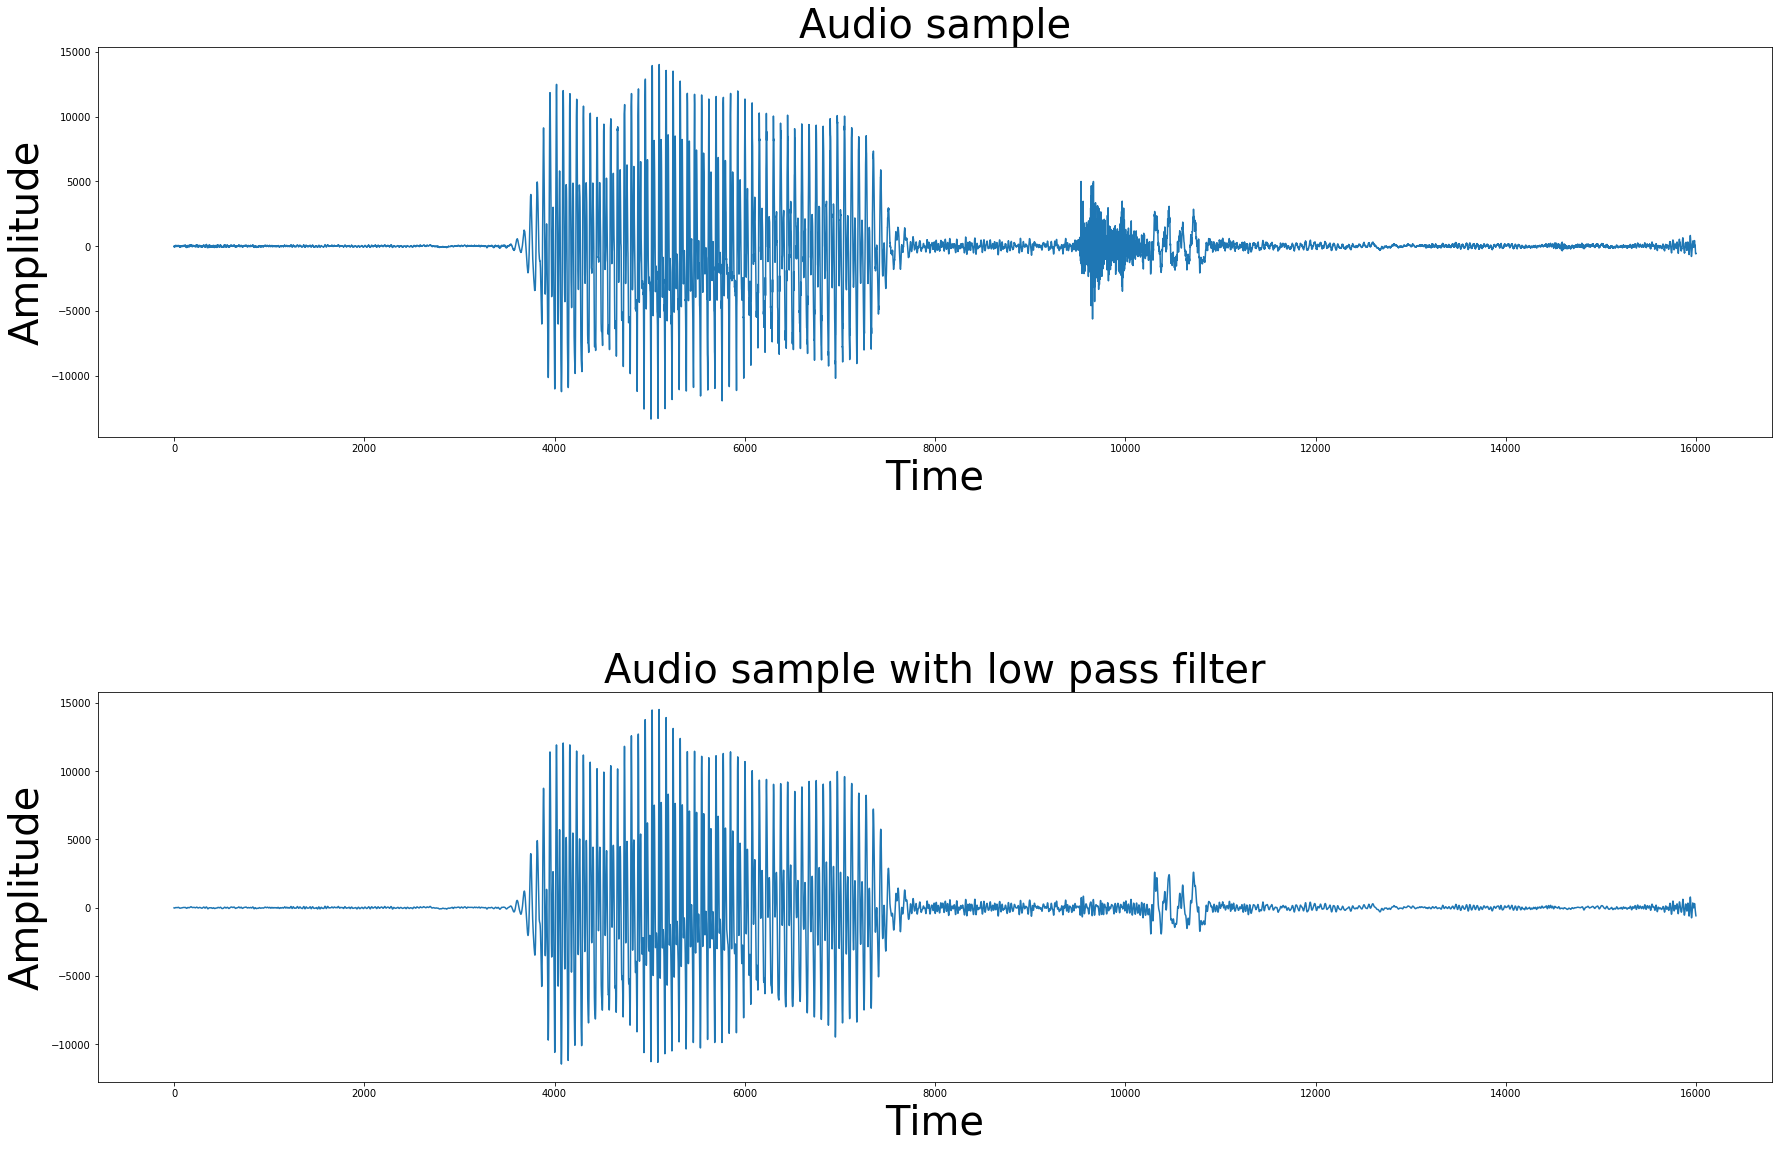

In [5]:

fig, (axs_raw, axs_low) = plt.subplots(2)
fig.tight_layout(pad=3.0)
fig.set_figheight(FIG_HEIGHT)
fig.set_figwidth(FIG_WIDTH)
# display the raw signal
axs_raw.plot(wav)
axs_raw.set_ylabel("Amplitude", fontsize=FONT_SIZE)
axs_raw.set_xlabel("Time", fontsize=FONT_SIZE)
axs_raw.set_title("Audio sample", fontsize=FONT_SIZE)

# display the low pass filtered signal
axs_low.plot(lowpass_signal)
axs_low.set_ylabel("Amplitude", fontsize=FONT_SIZE)
axs_low.set_xlabel("Time", fontsize=FONT_SIZE)
axs_low.set_title("Audio sample with low pass filter", fontsize=FONT_SIZE)

In [6]:
 # Compute periodogram
f_raw, periodogram_raw = signal.periodogram(wav, fs)
f_raw, periodogram_low= signal.periodogram(lowpass_signal, fs)


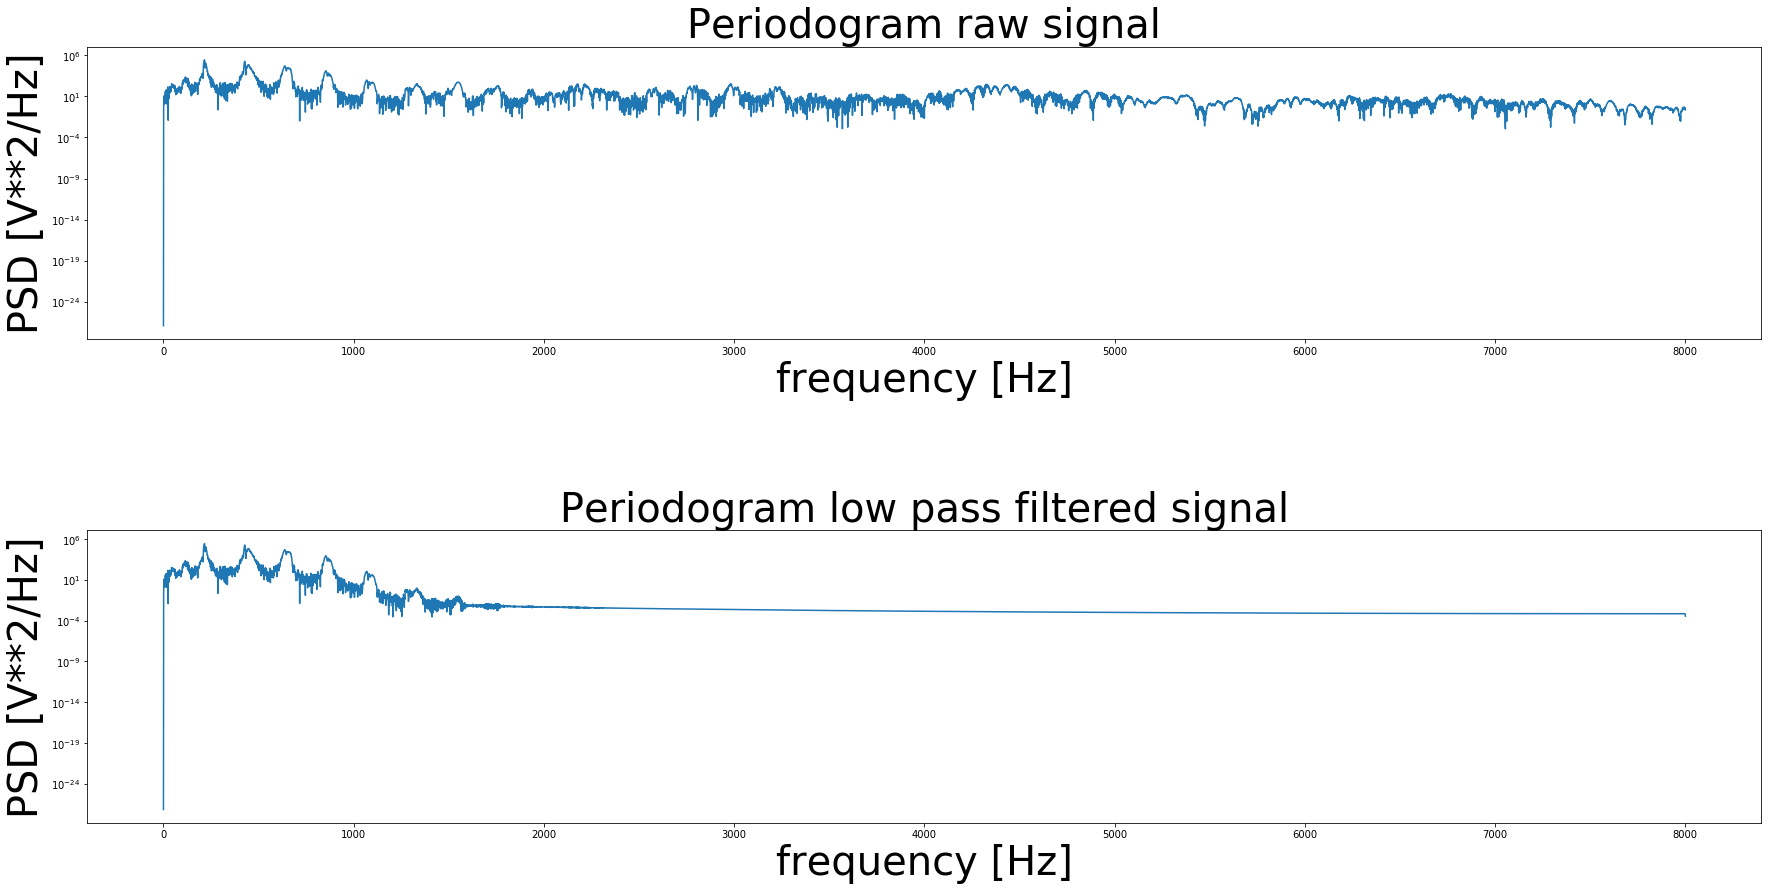

In [14]:
# Display periodogram for filtered input
fig, (axs_periodogram_raw, axs_periodogram_low) = plt.subplots(2)
fig.tight_layout(pad=3.0)
fig.set_figheight(FIG_HEIGHT)
fig.set_figwidth(FIG_WIDTH)

axs_periodogram_raw.semilogy(f_raw, periodogram_raw)
axs_periodogram_raw.set_xlabel('frequency [Hz]', fontsize=FONT_SIZE)
axs_periodogram_raw.set_ylabel('PSD [V**2/Hz]', fontsize=FONT_SIZE)
axs_periodogram_raw.set_title("Periodogram raw signal", fontsize=FONT_SIZE)



axs_periodogram_low.semilogy(f_raw, periodogram_low)
axs_periodogram_low.set_xlabel('frequency [Hz]', fontsize=FONT_SIZE)
axs_periodogram_low.set_ylabel('PSD [V**2/Hz]', fontsize=FONT_SIZE)
axs_periodogram_low.set_title("Periodogram low pass filtered signal", fontsize=FONT_SIZE)

plt.show()

# Analysis on full samples

100%|██████████| 64727/64727 [00:00<00:00, 148832.31it/s]


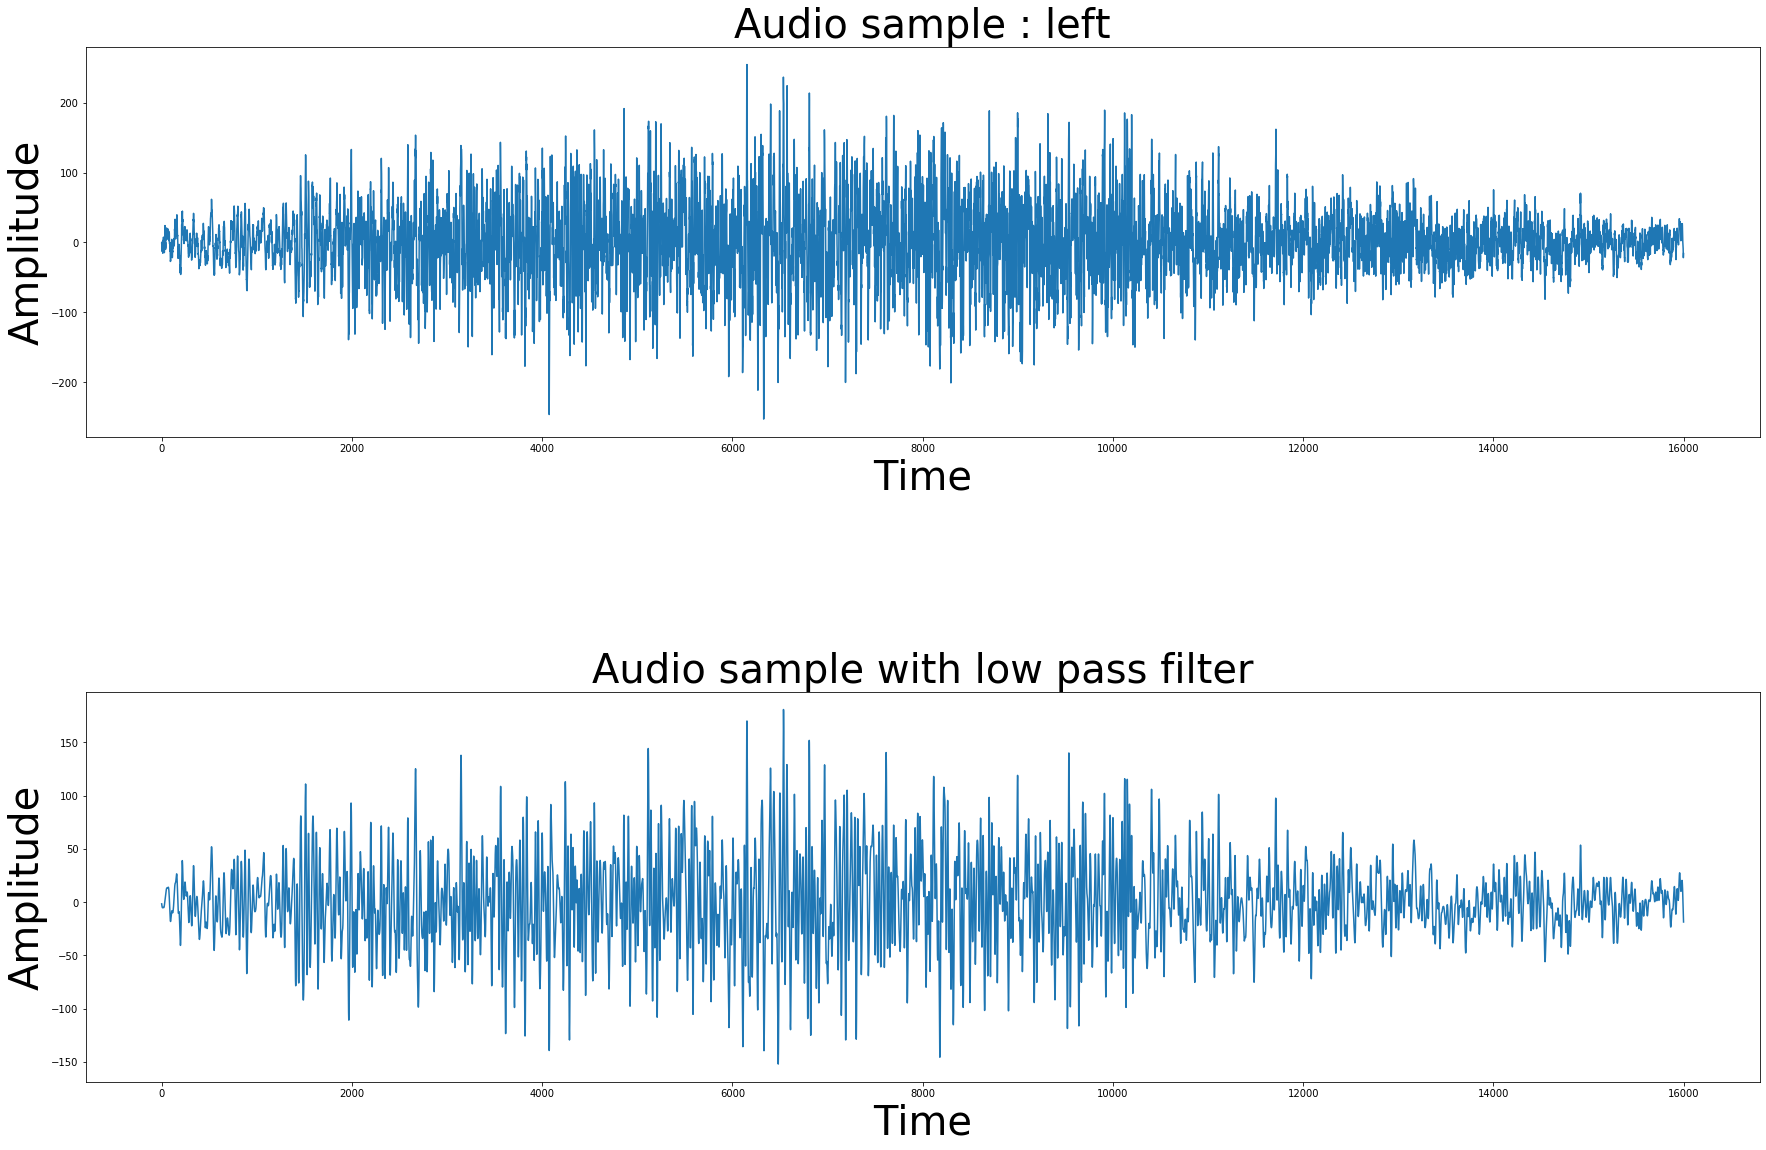

In [7]:
from analysis import display_lowpass_normal
indir = '../data/speech_cmd'
label = 'left'

data_dict = get_data(indir)
word_samples = data_dict[label]

mean_lowpass_array, normal_array = mean_low_pass_filter(word_samples, SAMPLE_RATE, CUTOFF_FREQ)
display_lowpass_normal(normal_array, mean_lowpass_array, SAMPLE_RATE, label)
plt.show()